In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("JUPITER")
planet.h_skip = 1000E3
planet.h_trap =  0.0E3
planet.loadAtmosphereModel('../atmdata/jupiter-galileo-asi.dat', 0 , 1 , 2, 3, heightInKmFlag=True)

In [16]:
speedRange = np.linspace(45, 55, 10)
gammaRange = np.linspace(-30, -6, 10)

acc_net_g_max_array       = np.zeros((len(speedRange),len(gammaRange)))
q_stag_total_max_array    = np.zeros((len(speedRange),len(gammaRange)))
heatload_max_array        = np.zeros((len(speedRange),len(gammaRange)))
dyn_pres_array            = np.zeros((len(speedRange),len(gammaRange)))
n = 0

for i, speed in enumerate(speedRange):
    for j, gamma in enumerate(gammaRange):
        vehicle=Vehicle('Galileo', 340, 267, 0.0, np.pi*1.26**2.0*0.25, 0.0, 0.22, planet)
        vehicle.setInitialState(450,0.0,0.0,speed,0.0,gamma,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (20*60, 0.1, 0.0)
        n+=1
        print("n = " + str(n) +"G_MAX: "+str("{:.2f}".format(max(vehicle.acc_net_g)))+", Q_MAX: "+str("{:.2f}".format(max(vehicle.q_stag_total)))+", J_MAX: "+str("{:.2f}".format(max(vehicle.heatload/1.0E3)))+", P_MAX: "+str("{:.2f}".format(max(vehicle.dyn_pres_atm))))

        acc_net_g_max_array[i,j]     = max(vehicle.acc_net_g)
        q_stag_total_max_array[i,j]  = max(vehicle.q_stag_total)
        heatload_max_array[i,j]      = max(vehicle.heatload/1.0E3)
        dyn_pres_array[i,j]         = max(vehicle.dyn_pres_atm)

n = 1G_MAX: 961.68, Q_MAX: 434049.02, J_MAX: 1219.13, P_MAX: 24.85
n = 2G_MAX: 868.13, Q_MAX: 368877.69, J_MAX: 1155.39, P_MAX: 22.43
n = 3G_MAX: 772.39, Q_MAX: 310405.42, J_MAX: 1090.51, P_MAX: 19.96
n = 4G_MAX: 675.25, Q_MAX: 258499.73, J_MAX: 1025.14, P_MAX: 17.45
n = 5G_MAX: 577.46, Q_MAX: 210711.82, J_MAX: 959.32, P_MAX: 14.92
n = 6G_MAX: 480.22, Q_MAX: 166673.37, J_MAX: 893.95, P_MAX: 12.41
n = 7G_MAX: 384.70, Q_MAX: 126757.70, J_MAX: 830.04, P_MAX: 9.94
n = 8G_MAX: 289.76, Q_MAX: 90761.95, J_MAX: 769.73, P_MAX: 7.49
n = 9G_MAX: 199.32, Q_MAX: 57331.90, J_MAX: 718.46, P_MAX: 5.15
n = 10G_MAX: 110.90, Q_MAX: 25708.92, J_MAX: 703.63, P_MAX: 2.87
n = 11G_MAX: 1008.94, Q_MAX: 558073.54, J_MAX: 1512.29, P_MAX: 26.07
n = 12G_MAX: 910.40, Q_MAX: 473484.52, J_MAX: 1429.11, P_MAX: 23.53
n = 13G_MAX: 810.02, Q_MAX: 397683.23, J_MAX: 1344.26, P_MAX: 20.93
n = 14G_MAX: 707.72, Q_MAX: 330275.91, J_MAX: 1258.11, P_MAX: 18.29
n = 15G_MAX: 605.10, Q_MAX: 268322.23, J_MAX: 1170.93, P_MAX: 15.64
n

In [5]:
from scipy import interpolate

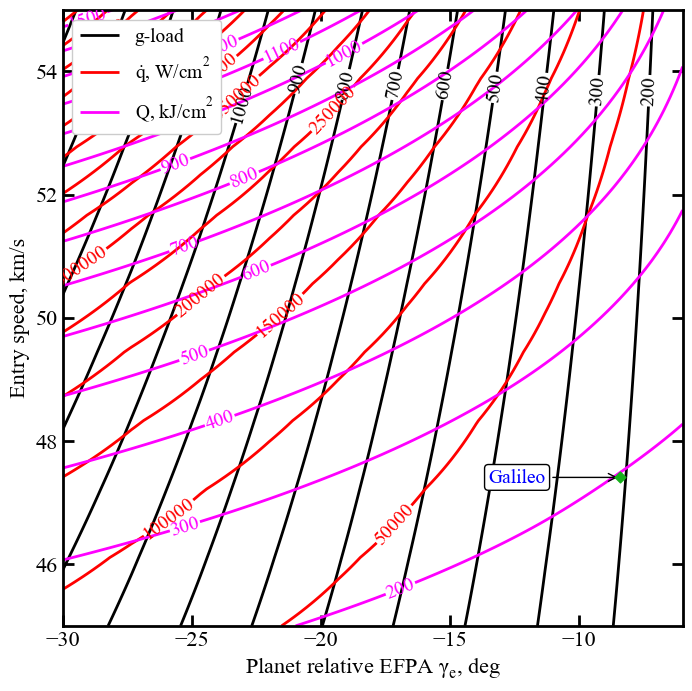

In [24]:
f1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(acc_net_g_max_array), kind='linear')
q1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(q_stag_total_max_array), kind='linear')
h1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(heatload_max_array), kind='cubic')
s1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(dyn_pres_array), kind='linear')

x_new = np.linspace(45, 55, 100)
y_new = np.linspace(-30, -6, 100)


g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        g1_new[i,j] = f1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])

X, Y = np.meshgrid(x_new, y_new)

fig = plt.figure()
fig.set_size_inches([8, 8])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

GCS1 = plt.contour(Y, X, np.transpose(g1_new), levels=15, linewidths=2.0, colors='black')
plt.clabel(GCS1, inline=1, fontsize=14, colors='black',fmt='%3d',inline_spacing=1)
#GCS1.collections[0].set_label(r'g-load')

QCS1 = plt.contour(Y, X, np.transpose(q1_new*0.2),  levels=15, linewidths=2.0, colors='red')
plt.clabel(QCS1, inline=1, fontsize=14, colors='red',fmt='%3d',inline_spacing=1)
#QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')

HCS1 = plt.contour(Y, X, np.transpose(h1_new*0.2), levels=15, linewidths=2.0, colors='magenta')
plt.clabel(HCS1, inline=1, fontsize=14, colors='magenta',fmt='%3d',inline_spacing=1)
#HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

plt.xlabel("Planet relative EFPA "+r'$\gamma_e$'+r', deg' ,fontsize=16)
plt.ylabel(r'Entry speed, km/s' ,fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')


ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

h1,l1 = GCS1.legend_elements()
h2,l1 = QCS1.legend_elements()
h3,l1 = HCS1.legend_elements()

plt.legend([h1[0], h2[0], h3[0]], ['g-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$'], 
           fontsize=14, loc='upper left', framealpha=1.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.scatter(-8.41, 47.41, marker="D", s=30, color='xkcd:green', zorder=5)
plt.annotate("Galileo", xy=(-8.41, 47.41), xytext=(-12.41, 47.41), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0), zorder=2)

plt.savefig('../plots/jupiter-probe-entry.png', dpi=300, bbox_inches='tight')
plt.show()